In [31]:
rootDir=r'C:\Users\Sir\OneDrive\Univeristy\HEA Analysis\4K06\Code\Data Folder\Processed Data'
TrainDtCsvDir=r'C:\Users\Sir\OneDrive\Univeristy\HEA Analysis\4K06\Code\Data Folder\Processed 0922\Tbreak_Yield.csv'
ValDtCsvDir=rootDir+r'Val_Tbreak_Yield.csv'
ValDtCsvDir0=rootDir+r'\Val_Tbreak_Yield_0Added.csv'
TrainDtFxwithPP=rootDir+r'\FixedTbreakWithPP.csv'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # Suppress FutureWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

TrainDf = pd.read_csv(TrainDtCsvDir)
ValDf = pd.read_csv(ValDtCsvDir0)

features = [
    'VEC', 'ElectDiff', 'Atomic Size Diff', 'Mixing Enthalpy', 'Mixing Entropy', 
    'AVG Shear Modulus', 'AVG Bulk Modulus', 'AVG Possion Ratio', 'Itinerate Electron', 
    'Cohesive Energy', 'Gamma', 'Local Size Mismatch', 'Local Shear Modulus Mismatch', 
    'Local Electronegativity Mismatch', 'Avg Melting Pt',
]

# Train: Extract features and target from the training dataset (TrainDf)
X_train = TrainDf[features]
y_train = TrainDf['Assigned Point']

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.25, random_state=20)




In [32]:
# Model 1: Random Forest
forest_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)
forest_model.fit(X_train_split, y_train_split)
y_pred_forest_test = forest_model.predict(X_test_split)


mse = mean_squared_error(y_test_split, y_pred_forest_test)
r2 = r2_score(y_test_split, y_pred_forest_test)

# Print evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(y_val_actual, y_pred_forest_val)
# print(f"Mean Squared Error: {mse}")




Mean Squared Error: 5037852.394450304
R-squared: 0.5714935520236788


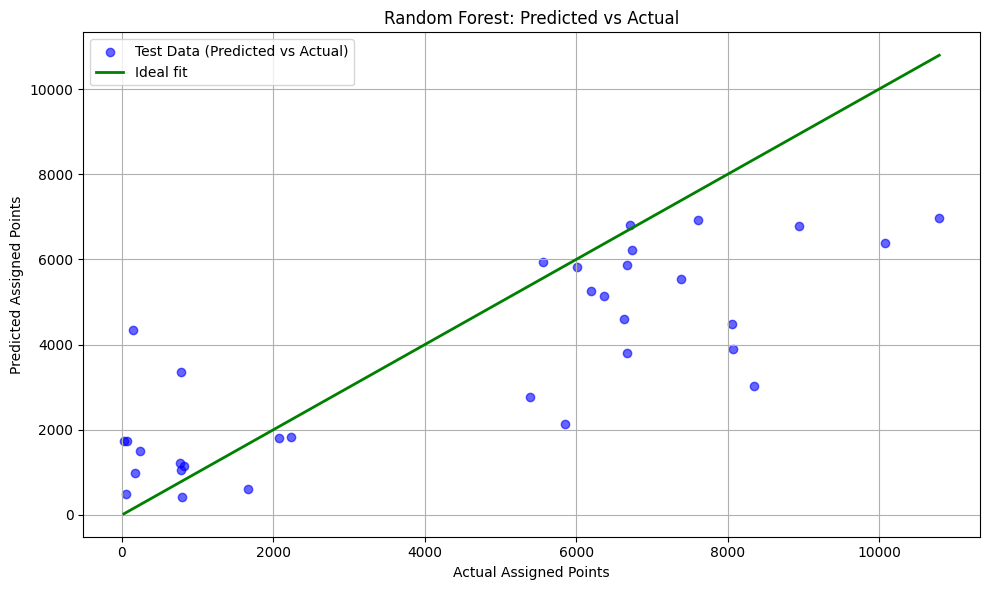

In [12]:
# Plot Predicted vs Actual for Decision Tree, Random Forest, and Linear Regression
plt.figure(figsize=(10,6))

# Subplot for Random Forest
#plt.subplot(1, 2, 1)
plt.scatter(y_test_split, y_pred_forest_test, alpha=0.6, color='b', label='Test Data (Predicted vs Actual)')
#plt.scatter(y_val_actual, y_pred_forest_val, alpha=0.6, color='r', label='Validation Data (Predicted vs Actual)')
plt.plot([min(y_test_split), max(y_test_split)], [min(y_test_split), max(y_test_split)], color='green', lw=2, label='Ideal fit')
plt.xlabel('Actual Assigned Points')
plt.ylabel('Predicted Assigned Points')
plt.title('Random Forest: Predicted vs Actual')
plt.legend()
plt.grid(True)



plt.tight_layout()
plt.show()




In [13]:
# Assuming best_model is a decision tree model
feature_importances = forest_model.feature_importances_

# Create a DataFrame to display feature names and their importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
importance_df


,Feature,Importance
1,ElectDiff,0.452066
3,Mixing Enthalpy,0.128961
4,Mixing Entropy,0.065758
12,Local Shear Modulus Mismatch,0.055208
5,AVG Shear Modulus,0.037365
7,AVG Possion Ratio,0.036933
2,Atomic Size Diff,0.036423
11,Local Size Mismatch,0.031305
0,VEC,0.028893
10,Gamma,0.028880


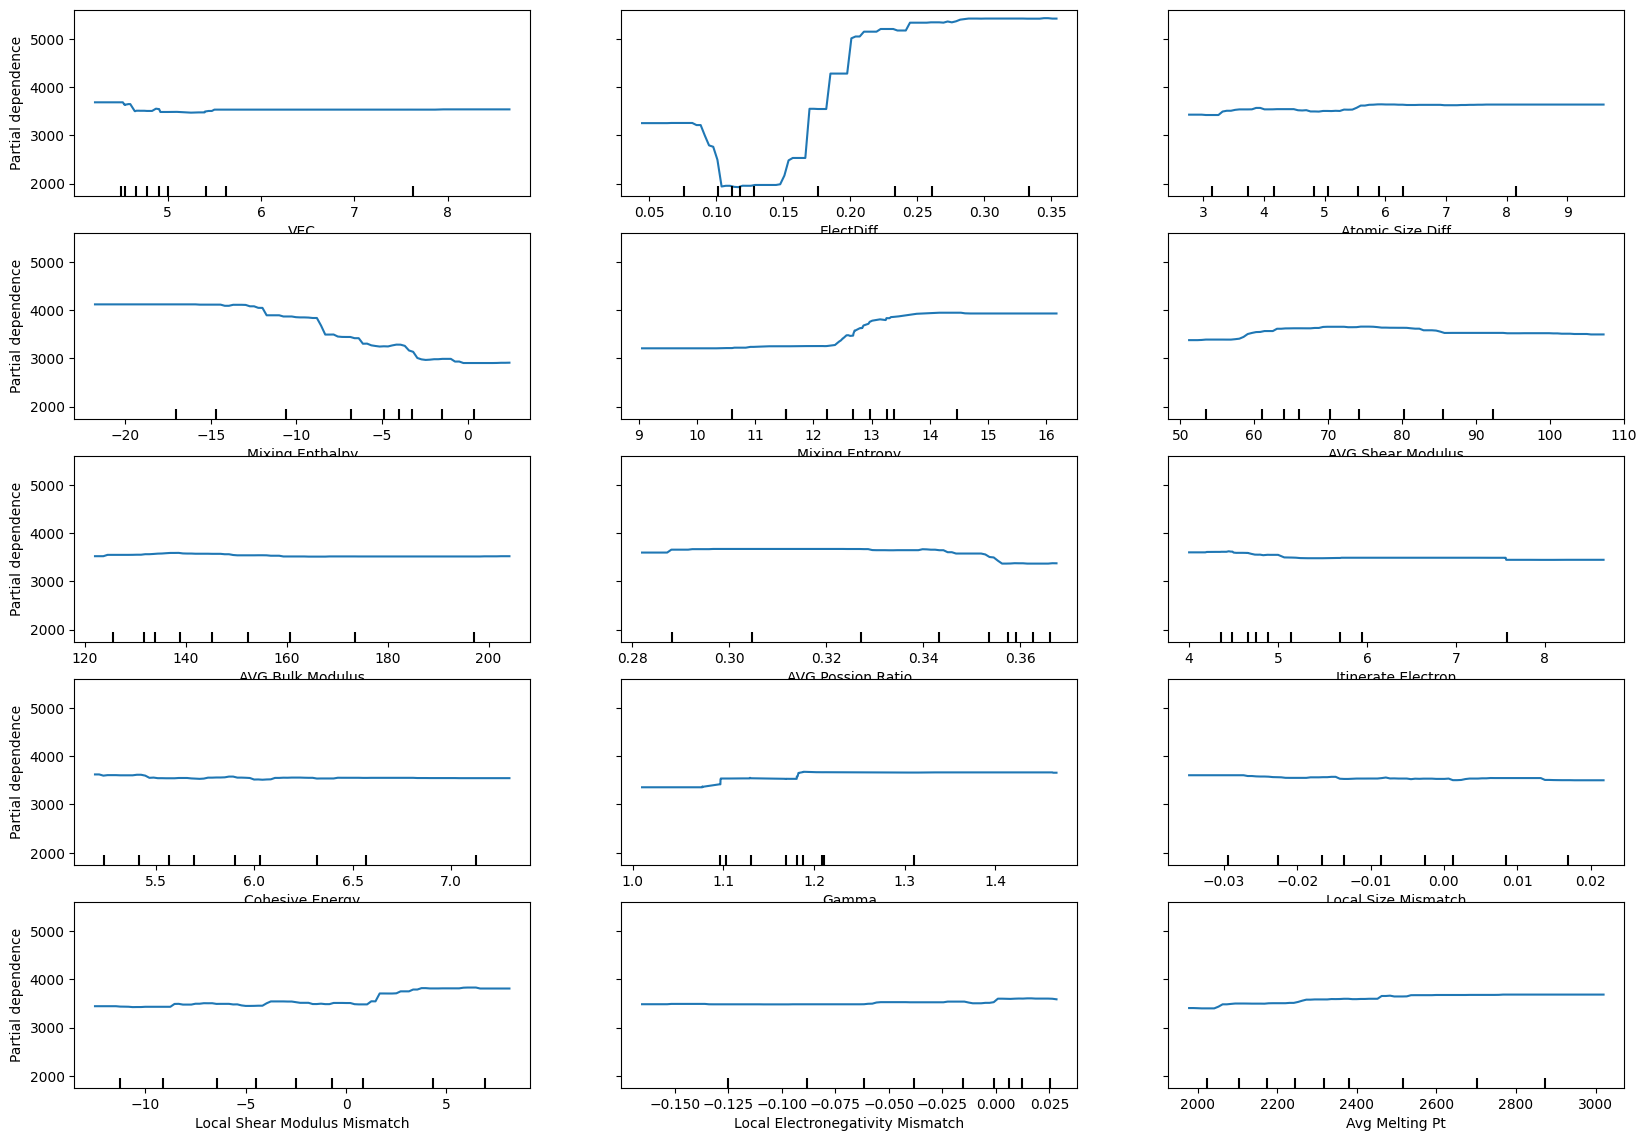

In [6]:
# Define the features and target


# Select the features and the target 'Assigned Point' from both TrainDf and ValDf
train_selected = TrainDf[features + ['Assigned Point']]
#val_selected = ValDf[features + ['Assigned Point']]

# Combine the two DataFrames into one
#combined_df = pd.concat([train_selected, val_selected], ignore_index=True)

# Display the first few rows of the combined DataFrame

import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Assuming you have already trained the Random Forest model and loaded the dataset
# Plot PDP for all features in the Random Forest model using PartialDependenceDisplay

features_to_plot = [0, 1, 2, 3, 4,5,6,7,8,9,10,11]  # Indexes of the features to plot

fig, ax = plt.subplots(figsize=(20, 14))
display = PartialDependenceDisplay.from_estimator(forest_model, train_selected[features],features, ax=ax)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


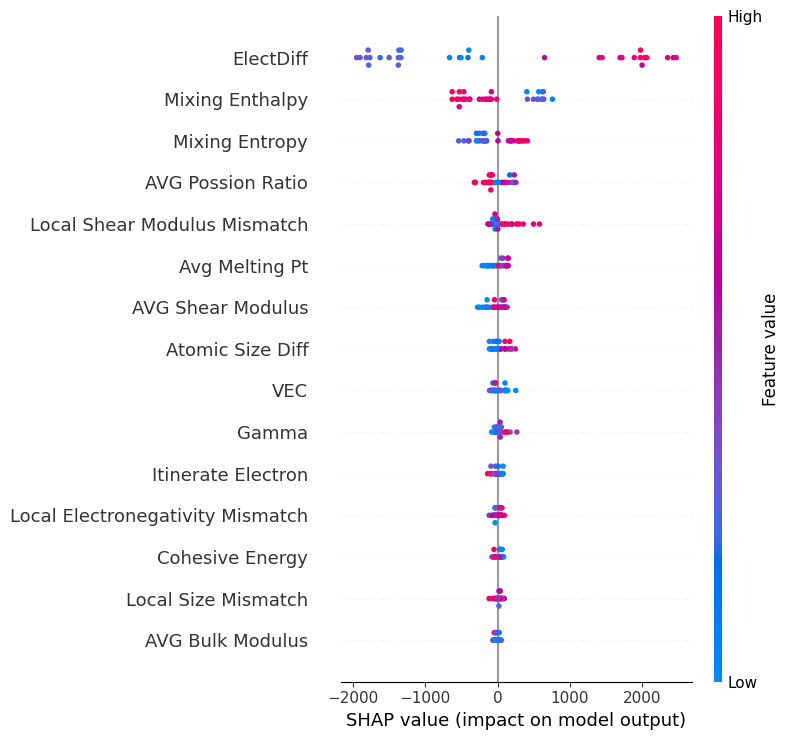

In [15]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

explainer = shap.TreeExplainer(forest_model)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test_split)

# Detailed summary plot showing impact of each feature
shap.summary_plot(shap_values, X_test_split, plot_type="dot")

### XGB Boost Model

Mean Squared Error: 1561909.9578641474
R-squared: 0.8053438663243545


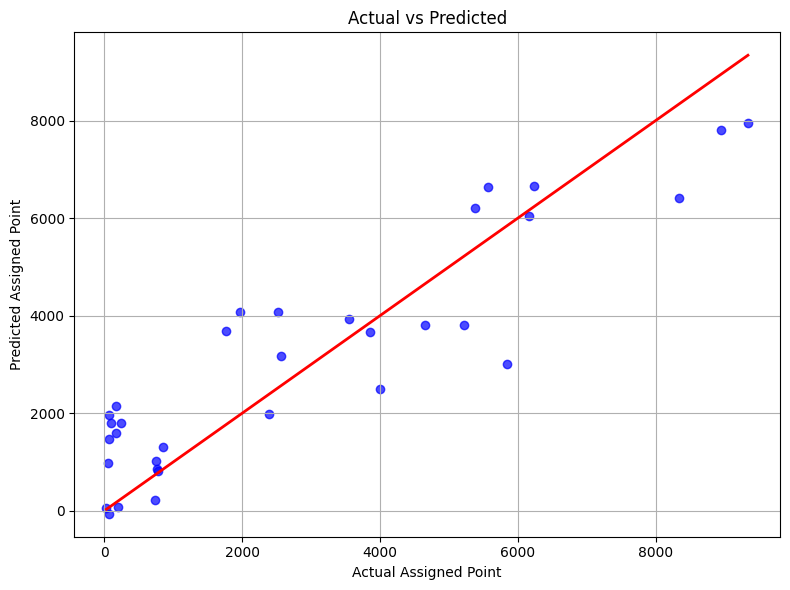

In [35]:

# Split the data into training and testing sets
X = TrainDf[features]
y = TrainDf['Assigned Point']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42,subsample=0.8,colsample_bytree=0.8)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # y = y line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Assigned Point')
plt.ylabel('Predicted Assigned Point')
plt.grid(True)
plt.tight_layout()
plt.show()

[06:36:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


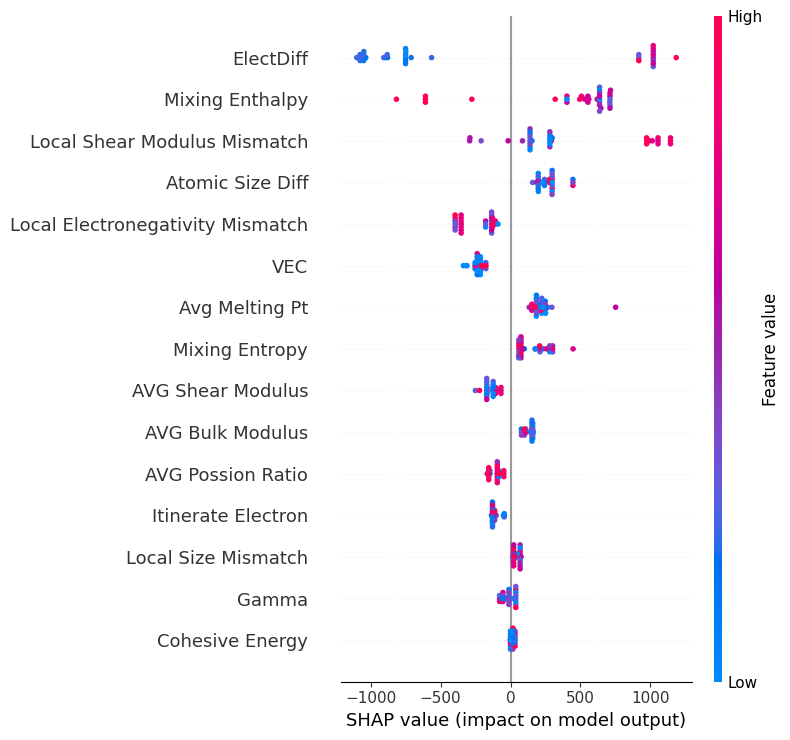

In [28]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Detailed summary plot showing impact of each feature
shap.summary_plot(shap_values, X_test, plot_type="dot")

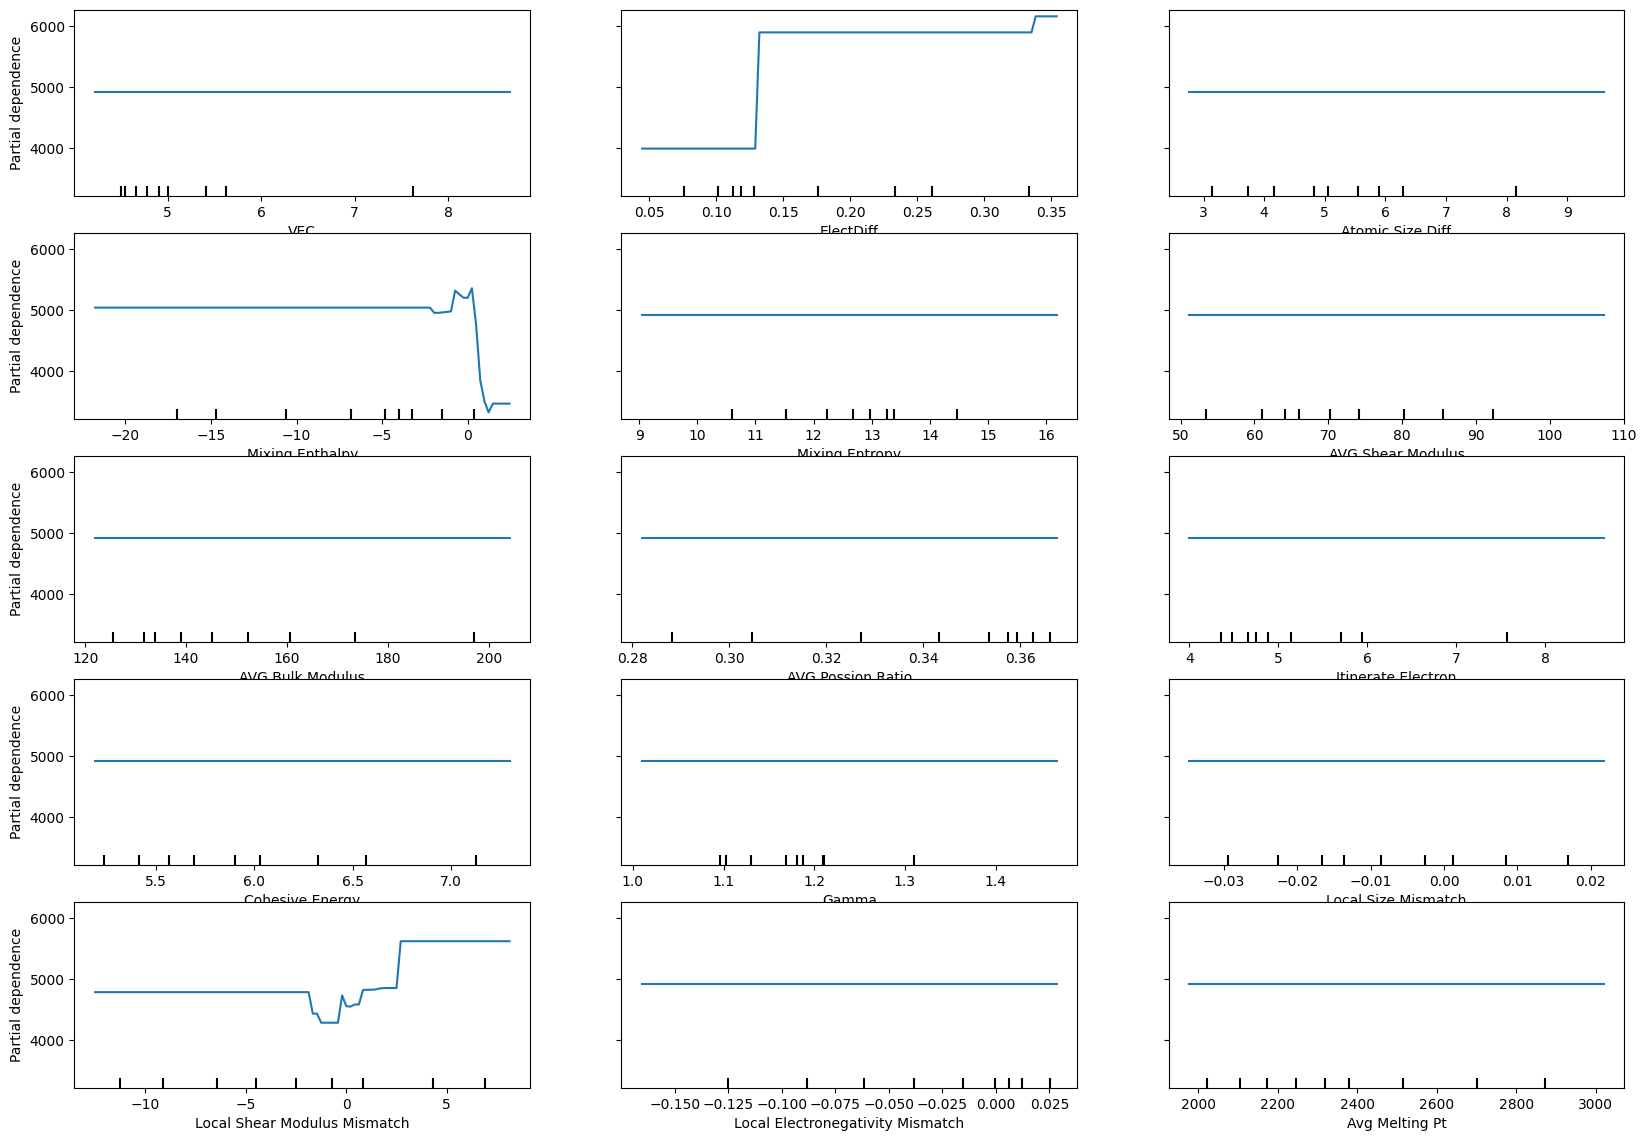

In [34]:
features_to_plot = [0, 1, 2, 3, 4,5,6,7,8,9,10,11]  # Indexes of the features to plot

fig, ax = plt.subplots(figsize=(20, 14))
display = PartialDependenceDisplay.from_estimator(xgb_model, train_selected[features],features, ax=ax)
plt.show()

### MLP Regressor

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

Best Hyperparameters: OrderedDict([('alpha', 0.01), ('batch_size', 16), ('learning_rate_init', 0.003412598346728738), ('max_iter', 496)])
Mean Squared Error: 3037525.1997608203
R-squared: 0.6214423831855664


Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


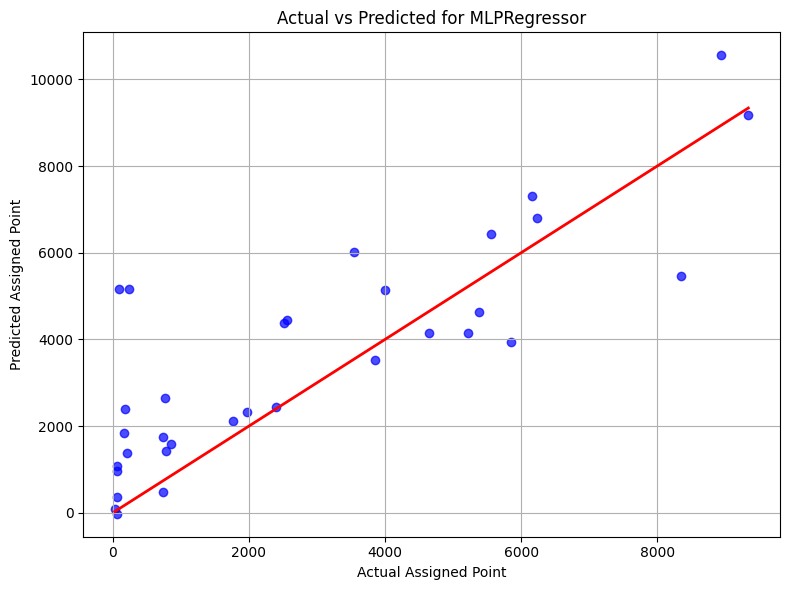

In [25]:
from sklearn.neural_network import MLPRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPRegressor (Multilayer Perceptron)
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=2000, random_state=42, learning_rate='adaptive')
param_space = {
    'learning_rate_init': Real(1e-4, 1e-2, prior='log-uniform'),  # Learning rate
    'alpha': Real(1e-6, 1e-2, prior='log-uniform'),  # L2 regularization parameter
    'batch_size': Integer(16, 128),  # Batch size for training
    'max_iter': Integer(200, 2000)  # Number of iterations
}
opt = BayesSearchCV(
    mlp_model,
    search_spaces=param_space,
    n_iter=30,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available cores
)
# Fit the model with Bayesian Optimization
opt.fit(X_train_scaled, y_train)

# Best hyperparameters found by Bayesian Optimization
print("Best Hyperparameters:", opt.best_params_)

# Predict on the test set
y_pred = opt.best_estimator_.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # y = y line
plt.title('Actual vs Predicted for MLPRegressor')
plt.xlabel('Actual Assigned Point')
plt.ylabel('Predicted Assigned Point')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot loss curve if available
if hasattr(opt, 'loss_curve_'):
    plt.figure(figsize=(8, 6))
    plt.plot(opt.loss_curve_)
    plt.title('MLP Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.tight_layout()
    plt.show()